# Task 1 Prediction using Supervised ML 
### Predict the percentage of marks of an student based on the number of study hours.
## By [Lakshya Bansal](http://www.lakshyabansal.me/)

**Installing Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Getting Data**

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Describing data**

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting Hours VS Scores to get an insight of correlation between them**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


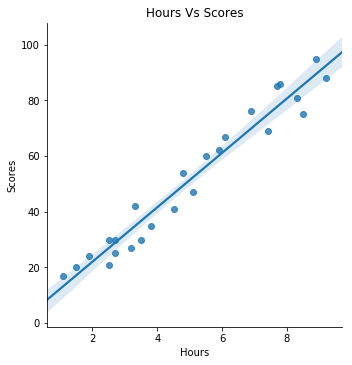

In [4]:
sns.lmplot(x="Hours",y="Scores",data=data)
plt.title("Hours Vs Scores")
plt.show()

**Magnitute of correlation between Hours and Scores**

In [5]:
data['Hours'].corr(data['Scores'])

0.9761906560220887

**Preparing data for Linear Regression**

In [6]:
X=data.iloc[:,0].values.reshape(-1, 1)
Y=data.iloc[:,1].values.reshape(-1, 1)

**Splitting data into Train and Test**

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

**Training Model**

In [8]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Plotting the trained model**

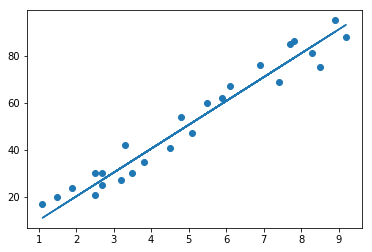

In [9]:
line=X*lr.coef_+lr.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

**Making Predictions**

In [10]:
Y_pred=lr.predict(X_test)
print(Y_pred)

[[11.12011779]
 [33.38368634]
 [19.2159609 ]]


**Evaluating the model**

Mean Absolute Error

In [11]:
mae=metrics.mean_absolute_error(Y_test,Y_pred)
print(mae)

6.426744991355392


R Square

In [12]:
r2_score=metrics.r2_score(Y_test,Y_pred)
print(r2_score)

0.6041054928963656


Score of the trained model

In [13]:
lr.score(X_train,Y_train)

0.9523449762548959